In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/Generic Projects/Glioma Grading

/content/drive/MyDrive/Machine learning 2024/Notebooks - Machine Learning/Generic Projects/Glioma Grading


In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np # Array Processing
import pandas as pd # Data Processing
import os # Input of Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns

Lets import our main data into the notebook

In [ ]:
data = pd.read_csv("dataset.csv")

It is a good habit to take a look at the data first. It gives us a lot of knowledge

In [ ]:
data.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

In [ ]:
data.Grade.value_counts(normalize=True)

,proportion
Grade,
0,0.580453
1,0.419547


In [ ]:
data.shape

(839, 24)

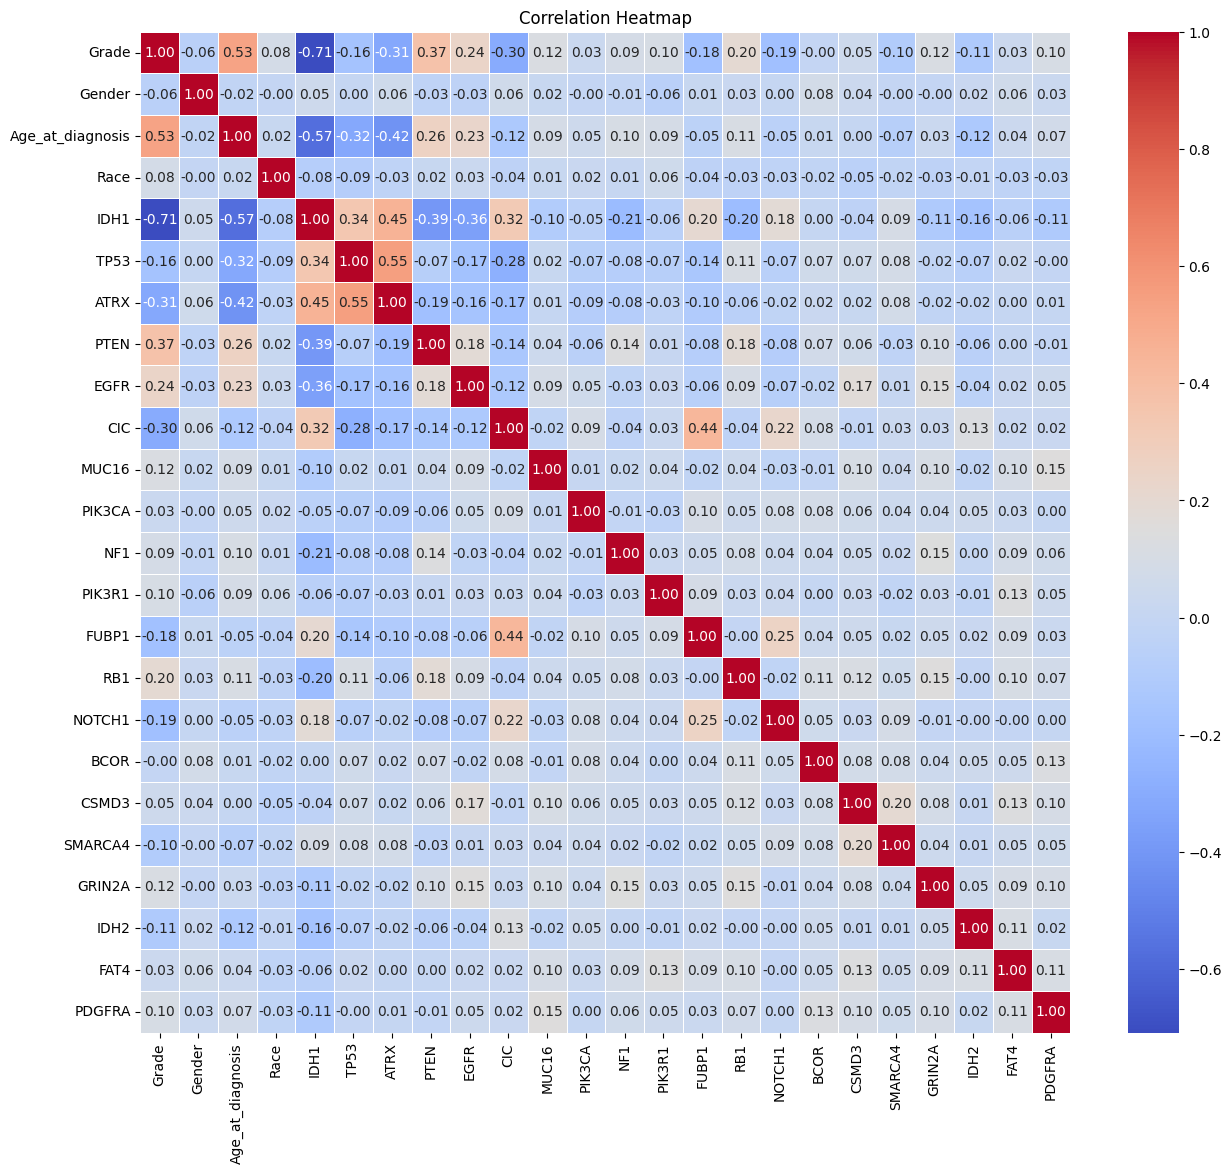

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with features
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Display summary statistics of the numerical features
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
            Grade      Gender  Age_at_diagnosis        Race        IDH1  \
count  839.000000  839.000000        839.000000  839.000000  839.000000   
mean     0.419547    0.418355         50.935411    0.107271    0.481526   
std      0.493779    0.493583         15.702339    0.369392    0.499957   
min      0.000000    0.000000         14.420000    0.000000    0.000000   
25%      0.000000    0.000000         38.055000    0.000000    0.000000   
50%      0.000000    0.000000         51.550000    0.000000    0.000000   
75%      1.000000    1.000000         62.800000    0.000000    1.000000   
max      1.000000    1.000000         89.290000    3.000000    1.000000   

             TP53        ATRX        PTEN        EGFR         CIC  ...  \
count  839.000000  839.000000  839.000000  839.000000  839.000000  ...   
mean     0.414779    0.258641    0.168057    0.133492    0.132300  ...   
std      0.492978    0.438149    0.374140    0.340309    0.339019  ...   
min    

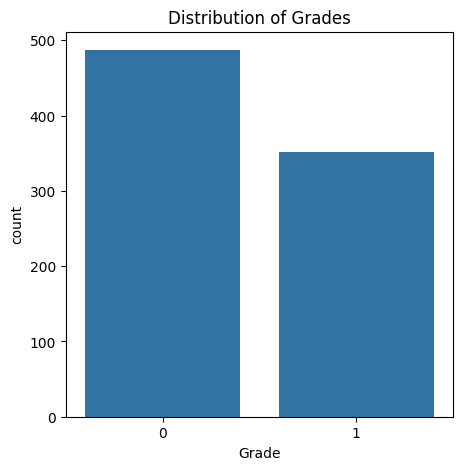

In [ ]:
# Visualize the distribution of the target variable 'Grade'
plt.figure(figsize=(5, 5))
sns.countplot(x='Grade', data=data)
plt.title('Distribution of Grades')
plt.show()

In [ ]:
# creating features and label

X = data.drop('Grade', axis = 1)
y = data['Grade']

In [ ]:
print(X.shape)
print(y.shape)

(839, 23)
(839,)


In [ ]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Apply Random Oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
X_resampled.shape

(882, 22)

## Logistic regression

Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

         LGG     0.9348    0.9348    0.9348        46
         GBM     0.9211    0.9211    0.9211        38

    accuracy                         0.9286        84
   macro avg     0.9279    0.9279    0.9279        84
weighted avg     0.9286    0.9286    0.9286        84



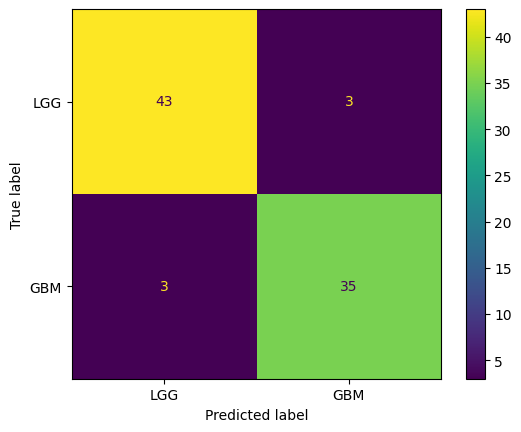

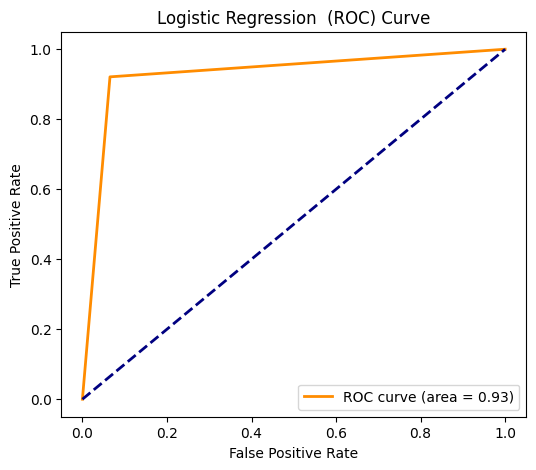

In [ ]:
class_names = ["LGG", "GBM"]
# Define the logistic regression model
log_reg = LogisticRegression(solver='liblinear')

# Define hyperparameter grid for grid search
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}

# Perform grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_log_reg = grid_search.best_estimator_

# Fit the best model to the data
best_log_reg.fit(X_train, y_train)

# Make predictions
y_pred = best_log_reg.predict(X_test)

# Accuracy score
log_reg_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", log_reg_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names,digits=4)
print("Classification Report:")
print(class_report)

from sklearn import metrics

cm=confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=class_names)

cm_display.plot()
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression  (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# K Neighbors Classifier (KNN)

Accuracy: 0.9523809523809523
Classification Report:
              precision    recall  f1-score   support

         LGG     0.9773    0.9348    0.9556        46
         GBM     0.9250    0.9737    0.9487        38

    accuracy                         0.9524        84
   macro avg     0.9511    0.9542    0.9521        84
weighted avg     0.9536    0.9524    0.9525        84



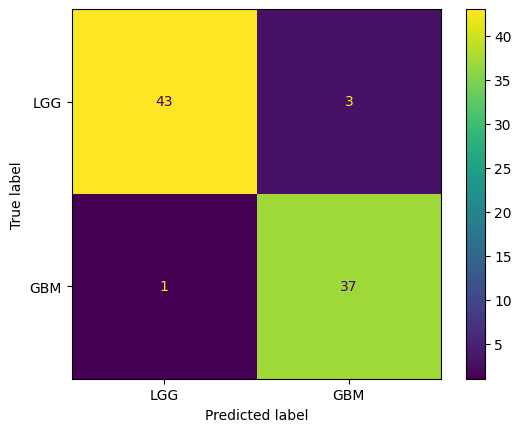

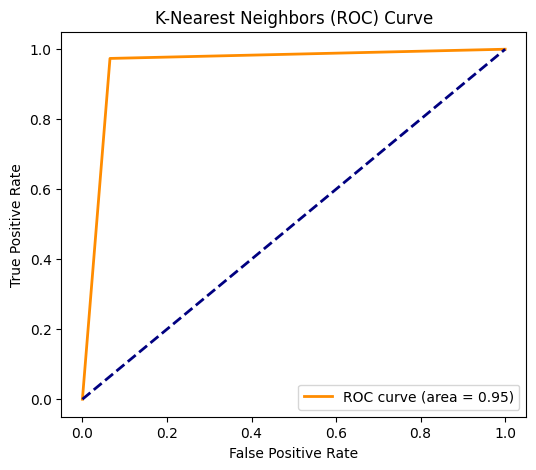

In [ ]:
# Define the K-Nearest Neighbors model
knn = KNeighborsClassifier()

# Define hyperparameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_knn = grid_search.best_estimator_

# Fit the best model to the data
best_knn.fit(X_resampled, y_resampled)

# Make predictions
y_pred = best_knn.predict(X_test)

# Accuracy score
knn_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names,digits=4)
print("Classification Report:")
print(class_report)

from sklearn import metrics

cm=confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=class_names)

cm_display.plot()
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Support Vector Classifier (SVC)

Accuracy: 0.9047619047619048
Classification Report:
              precision    recall  f1-score   support

         LGG     0.9318    0.8913    0.9111        46
         GBM     0.8750    0.9211    0.8974        38

    accuracy                         0.9048        84
   macro avg     0.9034    0.9062    0.9043        84
weighted avg     0.9061    0.9048    0.9049        84



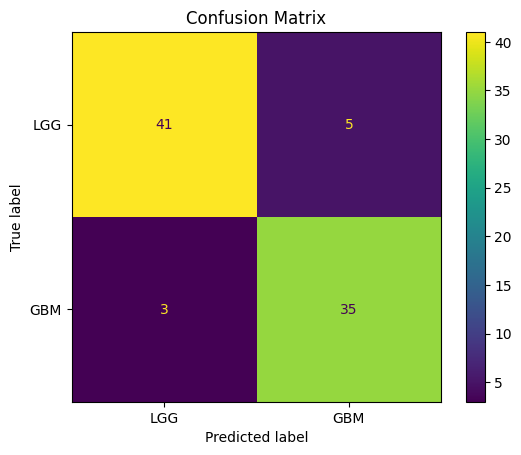

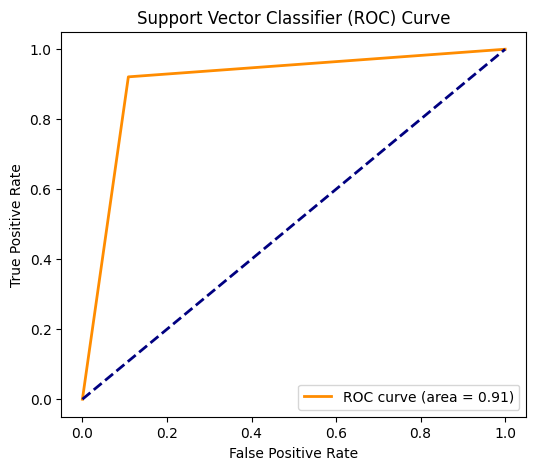

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

# Define the Support Vector Classifier model
svc = SVC(probability=True)  # Set probability to True for ROC curve

# Define hyperparameter grid for grid search
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}

# Perform grid search
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_svc = grid_search.best_estimator_

# Fit the best model to the data
best_svc.fit(X_resampled, y_resampled)

# Make predictions
y_pred = best_svc.predict(X_test)

# Accuracy score
svc_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", svc_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Classifier (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# SGD Classifier

Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

         LGG     0.9348    0.9348    0.9348        46
         GBM     0.9211    0.9211    0.9211        38

    accuracy                         0.9286        84
   macro avg     0.9279    0.9279    0.9279        84
weighted avg     0.9286    0.9286    0.9286        84



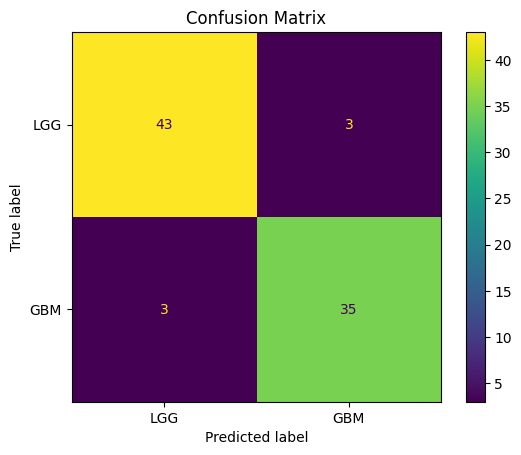

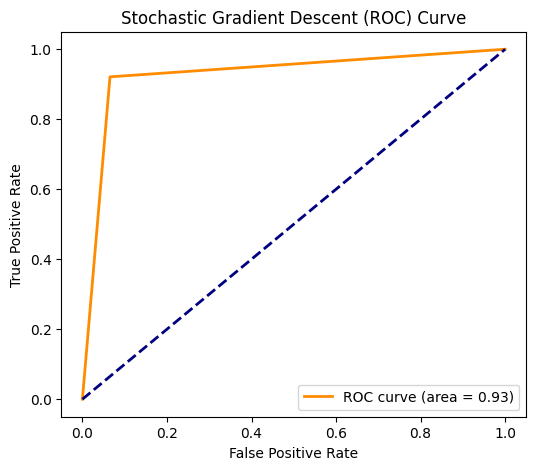

In [ ]:
# Define the Stochastic Gradient Descent model
sgd = SGDClassifier()

# Define hyperparameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'alpha': [0.0001,0.01, 0.1],
}

# Perform grid search
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_sgd = grid_search.best_estimator_

# Fit the best model to the data
best_sgd.fit(X_train, y_train)

# Make predictions
y_pred = best_sgd.predict(X_test)

# Accuracy score
sgd_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", sgd_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stochastic Gradient Descent (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree Classifier

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

         LGG     0.9348    0.9348    0.9348        46
         GBM     0.9211    0.9211    0.9211        38

    accuracy                         0.9286        84
   macro avg     0.9279    0.9279    0.9279        84
weighted avg     0.9286    0.9286    0.9286        84



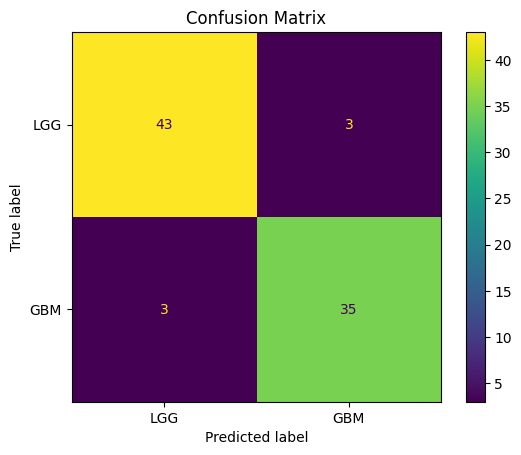

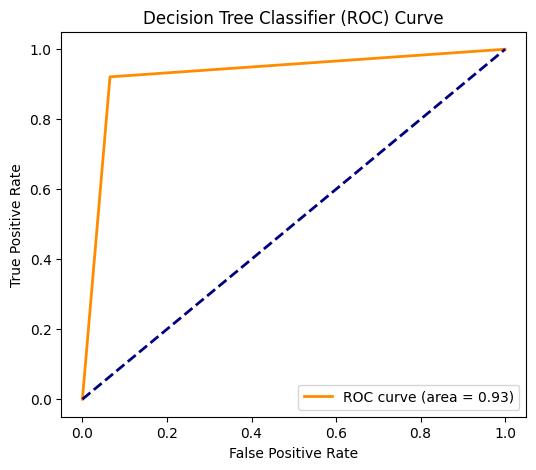

In [ ]:
# Define the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Define hyperparameter grid for grid search
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 32, 5),
    'min_samples_leaf': range(1, 10, 4),
    'min_samples_split': range(2, 10, 4),
}
# Perform grid search
grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

# Get the best model from grid search
best_dtc = grid_search_dt.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search_dt.best_params_)

# Fit the best model to the data
best_dtc.fit(X_resampled, y_resampled)

# Make predictions
y_pred = best_dtc.predict(X_test)

# Accuracy score
dtc_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", dtc_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classifier

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

         LGG     0.9348    0.9348    0.9348        46
         GBM     0.9211    0.9211    0.9211        38

    accuracy                         0.9286        84
   macro avg     0.9279    0.9279    0.9279        84
weighted avg     0.9286    0.9286    0.9286        84



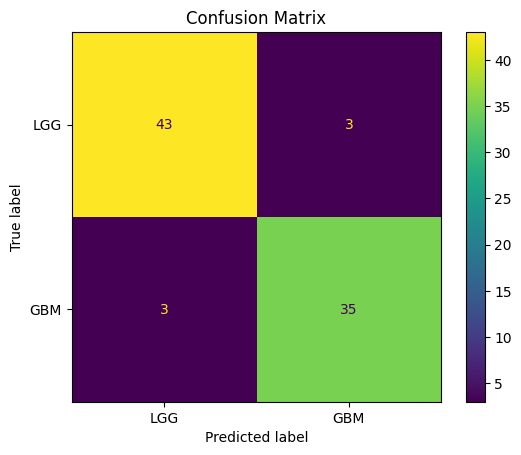

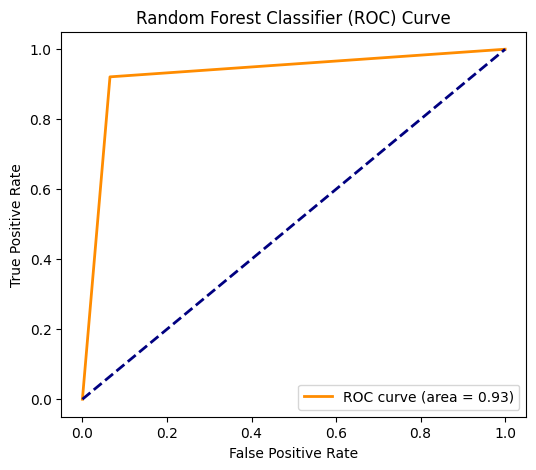

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rfc = RandomForestClassifier()

# Define hyperparameter grid for grid search
parameters = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search_rf = GridSearchCV(rfc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_rfc = grid_search_rf.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search_rf.best_params_)

# Fit the best model to the data
best_rfc.fit(X_train, y_train)

# Make predictions
y_pred = best_rfc.predict(X_test)

# Accuracy score
rfc_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", rfc_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Ada Boost Classifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

         LGG     0.9348    0.9348    0.9348        46
         GBM     0.9211    0.9211    0.9211        38

    accuracy                         0.9286        84
   macro avg     0.9279    0.9279    0.9279        84
weighted avg     0.9286    0.9286    0.9286        84



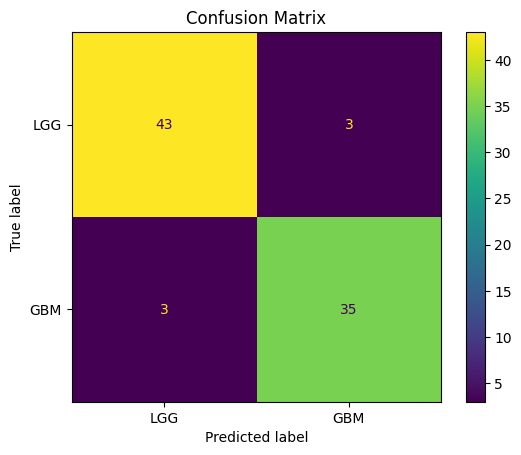

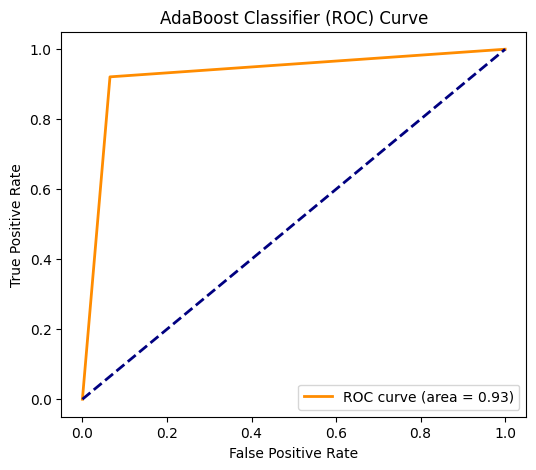

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define the AdaBoost Classifier
adaboost = AdaBoostClassifier()

# Define hyperparameter grid for grid search
parameters = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 5],
}

# Perform grid search
grid_search_adaboost = GridSearchCV(adaboost, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_adaboost.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_adaboost = grid_search_adaboost.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search_adaboost.best_params_)

# Fit the best model to the data
best_adaboost.fit(X_train, y_train)

# Make predictions
y_pred = best_adaboost.predict(X_test)

# Accuracy score
adaboost_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", adaboost_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Gradient Boosting Classifier

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

         LGG     0.9167    0.9565    0.9362        46
         GBM     0.9444    0.8947    0.9189        38

    accuracy                         0.9286        84
   macro avg     0.9306    0.9256    0.9275        84
weighted avg     0.9292    0.9286    0.9284        84



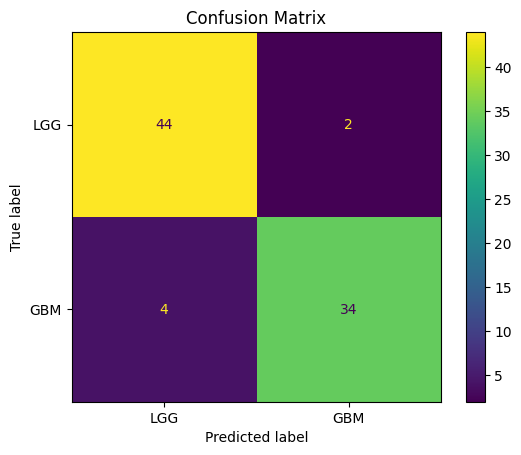

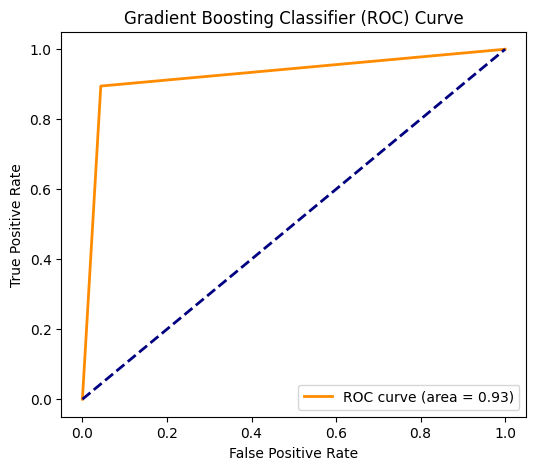

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Define hyperparameter grid for grid search
parameters = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search_gb = GridSearchCV(gb_classifier, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_gb.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_gb = grid_search_gb.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search_gb.best_params_)

# Fit the best model to the data
best_gb.fit(X_train, y_train)

# Make predictions
y_pred = best_gb.predict(X_test)

# Accuracy score
gb_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", gb_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Extreme Gradient Boosting

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'gamma': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Accuracy: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

         LGG     0.9149    0.9348    0.9247        46
         GBM     0.9189    0.8947    0.9067        38

    accuracy                         0.9167        84
   macro avg     0.9169    0.9148    0.9157        84
weighted avg     0.9167    0.9167    0.9166        84



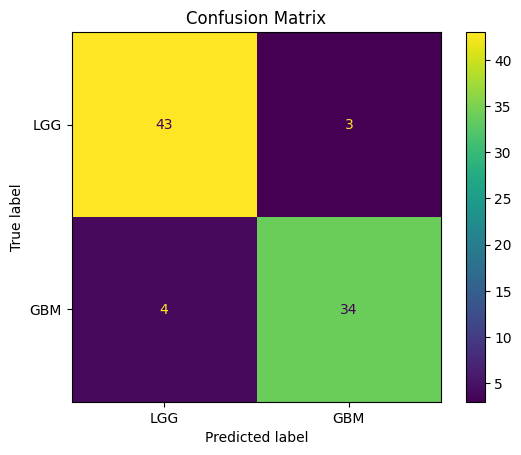

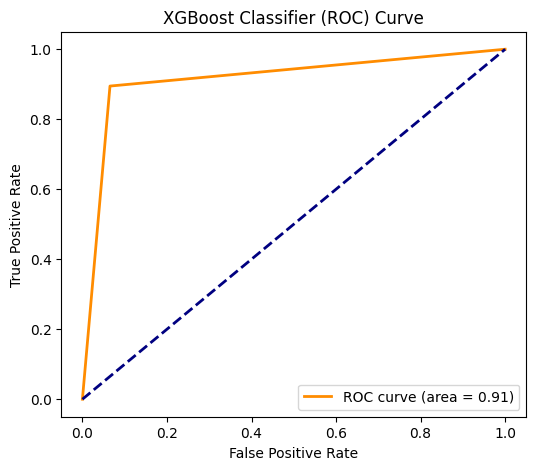

In [ ]:
# Define the XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()

# Define hyperparameter grid for grid search
parameters = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5],
    'gamma': [0, 1, 2]
}

# Perform grid search
grid_search_xgb = GridSearchCV(xgb_classifier, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search_xgb.best_params_)

# Fit the best model to the data
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred = best_xgb.predict(X_test)

# Accuracy score
xgb_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", xgb_acc)

# Classification report
class_report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

           0     0.9348    0.9348    0.9348        46
           1     0.9211    0.9211    0.9211        38

    accuracy                         0.9286        84
   macro avg     0.9279    0.9279    0.9279        84
weighted avg     0.9286    0.9286    0.9286        84



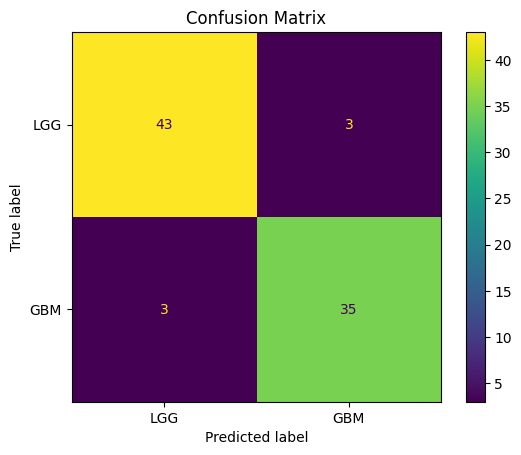

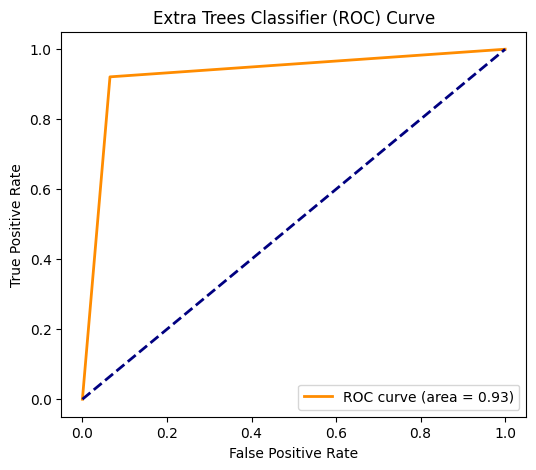

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


# Define the Extra Trees Classifier
et_classifier = ExtraTreesClassifier()

# Define hyperparameter grid for grid search
parameters = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search
grid_search_et = GridSearchCV(et_classifier, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_et.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_et = grid_search_et.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search_et.best_params_)

# Fit the best model to the data
best_et.fit(X_train, y_train)

# Make predictions
y_pred = best_et.predict(X_test)

# Accuracy score
et_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", et_acc)

# Classification report
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extra Trees Classifier (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'solver': 'sgd'}
Accuracy: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

           0     0.9149    0.9348    0.9247        46
           1     0.9189    0.8947    0.9067        38

    accuracy                         0.9167        84
   macro avg     0.9169    0.9148    0.9157        84
weighted avg     0.9167    0.9167    0.9166        84



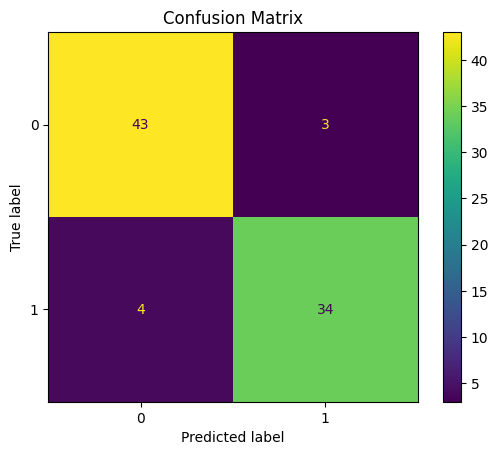

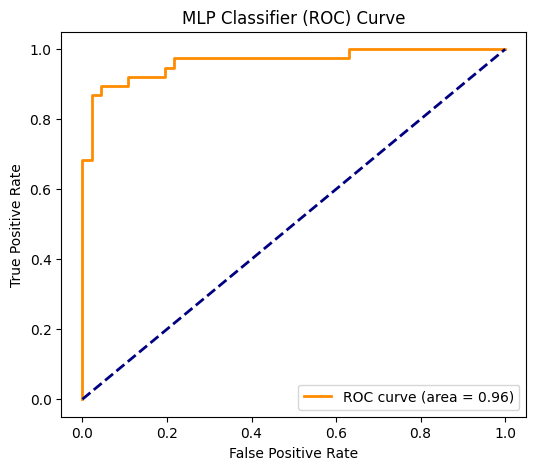

In [ ]:
from sklearn.neural_network import MLPClassifier
# Define the MLP Classifier
mlp_classifier = MLPClassifier()

# Define hyperparameter grid for grid search
mlp_parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'max_iter': [500, 1000],
}

# Perform grid search
grid_search_mlp = GridSearchCV(mlp_classifier, mlp_parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_mlp.fit(X_train, y_train)

# Get the best model from grid search
best_mlp = grid_search_mlp.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search_mlp.best_params_)

# Fit the best model to the data
best_mlp.fit(X_train, y_train)

# Make predictions
y_pred = best_mlp.predict(X_test)

# Accuracy score
mlp_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", mlp_acc)

# Classification report
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(class_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
y_scores = best_mlp.predict_proba(X_test)[:, 1]  # For binary classification
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Classifier (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# camparison

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'SGD Classifier', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Extra trees', 'MLP'],
    'Score': [log_reg_acc, knn_acc, svc_acc, sgd_acc, dtc_acc, rfc_acc,adaboost_acc, gb_acc, xgb_acc, et_acc,mlp_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,KNN,0.952381
0,Logistic Regression,0.928571
3,SGD Classifier,0.928571
4,Decision Tree Classifier,0.928571
5,Random Forest Classifier,0.928571
6,Ada Boost Classifier,0.928571
7,Gradient Boosting Classifier,0.928571
9,Extra trees,0.928571
8,XgBoost,0.916667
10,MLP,0.916667
